# Premier modèle IA

## Regression linéaire simple

### récupération des données

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
data = pd.read_csv("./Data_Reg/reg_simple.csv")
data.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [20]:
x=np.array(data["heure_rev"])#pour recuperer le vecteur X
#X=X.reshape(len(X),1)#redimentionner et l'affiché en colonne
x.shape

(27,)

In [21]:
Y=np.array(data["note"])
#Y=Y.reshape(len(Y),1)
Y.shape

(27,)

# Visualisation des données

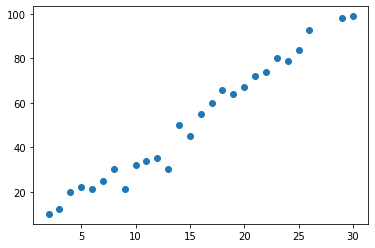

In [22]:


plt.scatter(x, Y)# nuage de point
plt.show()

# Création du modèle (model(X,theta) )

In [23]:
x_ones =np.array()
x

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 29, 30], dtype=int64)